# OpenCVの使い方1
バージョン4に対応した内容です。


## バージョンの確認とライブラリの読み込み

In [0]:
import cv2
print(cv2.__version__)

4.1.2


In [0]:
import matplotlib.pyplot as plt

## 画像の準備

* Googleドライブをマウントしておいてください。
コピー元のパスは自分の環境に合わせてください。

In [0]:
cp  /content/drive/'My Drive'/images/mika.jpg ./

## OpenCVの画像データの特徴
Web画像の色情報は通常RGBの型で情報が管理されています。  
OpenCVでは、BGRの型で情報が管理されています。また、その情報はNumpy配列で管理されています。


![代替テキスト](https://itstudio.co/sample/images/RGB1.png)

Numpy 配列のshape、つまり形状（各次元のサイズ）はy軸のピクセル数、x軸のピクセル数、カラー情報の順番でできています。

画像の原点は左上です。

![代替テキスト](https://itstudio.co/sample/images/opencv1.png)

In [0]:
my_img_bgr = cv2.imread('mika.jpg')

print(type(my_img_bgr))
print(my_img_bgr.shape)
print(my_img_bgr)

<class 'numpy.ndarray'>
(720, 480, 3)
[[[219 215 210]
  [219 215 210]
  [219 215 210]
  ...
  [225 221 216]
  [225 221 216]
  [225 221 216]]

 [[219 215 210]
  [219 215 210]
  [219 215 210]
  ...
  [226 222 217]
  [225 221 216]
  [225 221 216]]

 [[219 215 210]
  [219 215 210]
  [219 215 210]
  ...
  [226 222 217]
  [225 221 216]
  [225 221 216]]

 ...

 [[225 222 217]
  [225 222 217]
  [225 222 217]
  ...
  [229 226 221]
  [228 225 220]
  [228 225 220]]

 [[224 221 216]
  [224 221 216]
  [224 221 216]
  ...
  [228 225 221]
  [228 225 221]
  [228 225 221]]

 [[224 221 216]
  [224 221 216]
  [224 221 216]
  ...
  [228 225 221]
  [228 225 221]
  [228 225 221]]]


In [0]:
# cv2.imshow("image", my_img_bgr)

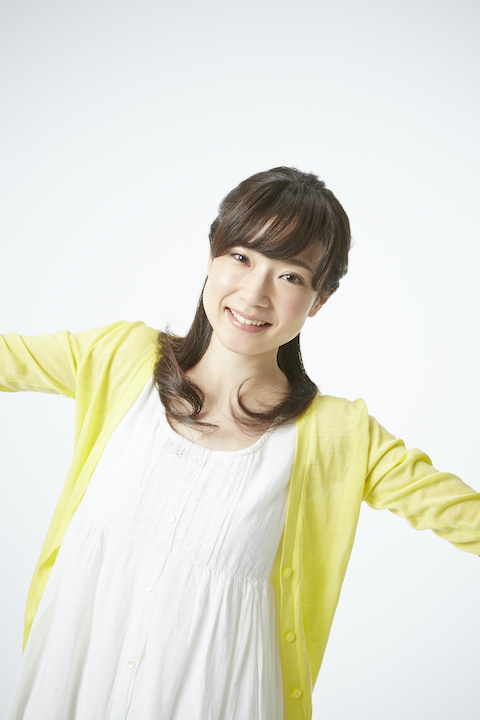

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(my_img_bgr)

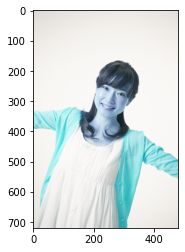

In [0]:
plt.imshow(my_img_bgr)
plt.show()

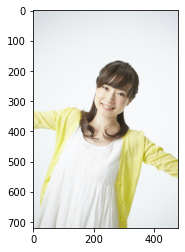

In [0]:
my_img = cv2.cvtColor(my_img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(my_img)
plt.show()

### 色の構成をヒストグラム で確認
cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

* images : 入力画像です．画素値のデータ型はuint8かfloat32のどちらかです．記号[]を使って “[img]” のように指定します．
* channels : ヒストグラムを計算する画像のチャンネルのインデックスです．入力画像がグレースける画像であれば[0]を指定します．カラー画像であればヒストグラムを計算するB,G,Rの色相に対応する[0]，[1]，[2]のどれかの値を指定します．
* mask : マスク画像です．画像中の全画素のヒストグラムを計算する場合 “None” を指定します．画像中の特定領域のヒストグラムを計算する場合は特定領域を表すマスク画像を指定します
* histSize : ビンの数です．この引数も記号[]を使って指定します．全画素値を対象とするのであれば [256] を指定します．
* ranges : ヒストグラムを計測したい画素値の範囲を表す RANGE です．通常は [0,256] を指定します．

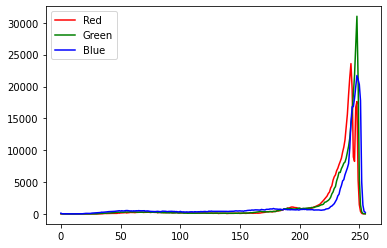

In [0]:
color_list = ['Red', 'Green', 'Blue']
for i, j in enumerate(color_list):
  hist = cv2.calcHist([my_img],[i], None, [256], [0,256])
  plt.plot(hist, color = j, label= j)
plt.legend()

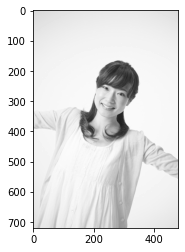

In [0]:
my_img_gray = cv2.cvtColor(my_img, cv2.COLOR_RGB2GRAY)
plt.imshow(my_img_gray, cmap='gray')
plt.show()

### 課題
Numpy配列の入れ替えでBGRをRGBに変換してみましょう。

In [0]:
print(my_img_bgr.shape)
my_img_bgr

(720, 480, 3)


array([[[219, 215, 210],
        [219, 215, 210],
        [219, 215, 210],
        ...,
        [225, 221, 216],
        [225, 221, 216],
        [225, 221, 216]],

       [[219, 215, 210],
        [219, 215, 210],
        [219, 215, 210],
        ...,
        [226, 222, 217],
        [225, 221, 216],
        [225, 221, 216]],

       [[219, 215, 210],
        [219, 215, 210],
        [219, 215, 210],
        ...,
        [226, 222, 217],
        [225, 221, 216],
        [225, 221, 216]],

       ...,

       [[225, 222, 217],
        [225, 222, 217],
        [225, 222, 217],
        ...,
        [229, 226, 221],
        [228, 225, 220],
        [228, 225, 220]],

       [[224, 221, 216],
        [224, 221, 216],
        [224, 221, 216],
        ...,
        [228, 225, 221],
        [228, 225, 221],
        [228, 225, 221]],

       [[224, 221, 216],
        [224, 221, 216],
        [224, 221, 216],
        ...,
        [228, 225, 221],
        [228, 225, 221],
        [228, 225, 221]]

In [0]:
bgr_inverse = my_img_bgr[:, :, ::-1]
bgr_inverse

array([[[210, 215, 219],
        [210, 215, 219],
        [210, 215, 219],
        ...,
        [216, 221, 225],
        [216, 221, 225],
        [216, 221, 225]],

       [[210, 215, 219],
        [210, 215, 219],
        [210, 215, 219],
        ...,
        [217, 222, 226],
        [216, 221, 225],
        [216, 221, 225]],

       [[210, 215, 219],
        [210, 215, 219],
        [210, 215, 219],
        ...,
        [217, 222, 226],
        [216, 221, 225],
        [216, 221, 225]],

       ...,

       [[217, 222, 225],
        [217, 222, 225],
        [217, 222, 225],
        ...,
        [221, 226, 229],
        [220, 225, 228],
        [220, 225, 228]],

       [[216, 221, 224],
        [216, 221, 224],
        [216, 221, 224],
        ...,
        [221, 225, 228],
        [221, 225, 228],
        [221, 225, 228]],

       [[216, 221, 224],
        [216, 221, 224],
        [216, 221, 224],
        ...,
        [221, 225, 228],
        [221, 225, 228],
        [221, 225, 228]]

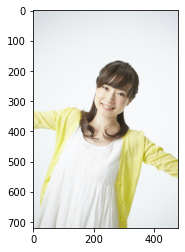

In [0]:
plt.imshow(bgr_inverse)
plt.show()

## 画像の保存

In [0]:
cv2.imwrite('mika_gray.jpg',my_img_gray)

True

## トリミング
トリミングはNumpy 配列の操作で行います。

![代替テキスト](https://itstudio.co/sample/images/opencv2.png)


(720, 480, 3)


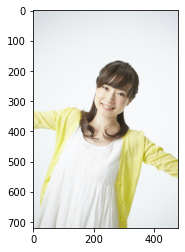

In [0]:
# 画像の読み込みとBGRをRGBに変換
mika_bgr = cv2.imread('mika.jpg')
mika_rgb = cv2.cvtColor(mika_bgr, cv2.COLOR_BGR2RGB)
size = mika_rgb.shape
print(size)
plt.imshow(mika_rgb)
plt.show()

(360, 240, 3)


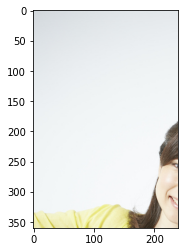

In [0]:
# トリミング
mika_trimming1 = mika_rgb[:size[0]//2,: size[1]//2]
print(mika_trimming1.shape)
plt.imshow(mika_trimming1);
plt.show()

(360, 240, 3)


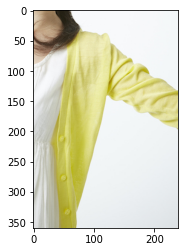

In [0]:
mika_trimming2 = mika_rgb[size[0]//2 :, size[1]//2 :]
print(mika_trimming2.shape)
plt.imshow(mika_trimming2);
plt.show()

## リサイズ
リサイズのメソッドは次のようになっています。

縦横比固定のリサイズは、第1引数が画像のソース、第2引数が新しいサイズになります。
cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) 

* fx: x 方向の倍率
* fy: y 方向の倍率
* interpolation: 補完方法
 * cv2.INTER_NEAREST: 最近傍補間
 * cv2.INTER_LINEAR: バイリニア補間 (デフォルト)
 * cv2.INTER_CUBIC: バイキュービック補間
 * cv2.INTER_AREA: ピクセル領域の関係を利用したリサンプリング
 * cv2.INTER_LANCZOS4: Lanczos 補間

デフォルトのバイリニア補完より、cv2.INTER_AREAの方がより自然な場合もありますので色々試すと良いでしょう。

サイズ： (720, 480, 3)
新しいサイズ: (1440, 960, 3)


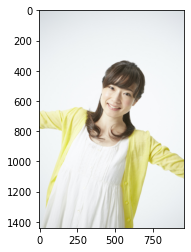

In [0]:
mika_rgb = cv2.cvtColor(mika_bgr, cv2.COLOR_BGR2RGB)

size = mika_rgb.shape
print('サイズ：', size)
new_size = (size[1]*2, size[0]*2) #新しいサイズ
resized_img = cv2.resize(mika_rgb, new_size)
print('新しいサイズ:', resized_img.shape)
plt.imshow(resized_img);
plt.show()

新しいサイズ: (180, 120, 3)


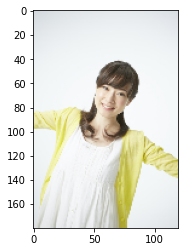

In [0]:
new_size2 = (mika_rgb.shape[1] // 4,mika_rgb.shape[0] // 4)
resized_img2 = cv2.resize(mika_rgb, new_size2)
print('新しいサイズ:', resized_img2.shape)
plt.imshow(resized_img2);
plt.show()

new_size2, cv2.INTER_AREAを指定した方が少し自然になります。

新しいサイズ: (180, 120, 3)


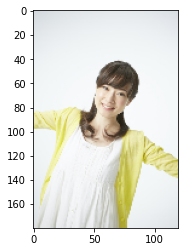

In [0]:
new_size3 = (mika_rgb.shape[1] // 4,mika_rgb.shape[0] // 4)
resized_img3 = cv2.resize(mika_rgb, new_size3, cv2.INTER_AREA)
print('新しいサイズ:', resized_img3.shape)
plt.imshow(resized_img3);
plt.show()